<a href="https://colab.research.google.com/github/VectorJamo/Deep-Learning/blob/main/Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# A basic(vanilla) form of a neural network. Contains an input layer, 2 hidden layers and an output layer.
# The problem: Given 4 different input features of an Iris plant, determine/predict its type (standard classification problem).
# Where, the 4 features are: sepal length, sepal width, petal length, petal width
# And, the types are: Iris Setosa, Iris Versicolour and Iris Virginica
import torch
import torch.nn as nn # The blueprint for a neural network
import torch.nn.functional as F # For activation functions eg. sigmoid, relu etc.

In [2]:
# Create the model
class Model(nn.Module):
  # Define the number of input features, neurons in the first hidden layer, neurons in the second hidden layer and the number of output features.
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    # Define the layers. fc -> fully connected layer, each neuron in layer 'l' receives the output of all neurons
    # from its previous layer 'l-1')
    self.fc1 = nn.Linear(in_features, h1) # input layer - first hidden layer
    self.fc2 = nn.Linear(h1, h2) # first hidden layer - second hidden layer
    self.out = nn.Linear(h2, out_features) # second hidden layer - output layer
    # nn.Linear basically means that each layer (and its each neuron) will perform a linear transformation to the input values to give an output
    # The equation is a standard FFNN equation for a layer, which is given as y = W*x + b. Where y is the output from a layer (a vector of all the
    # real number outputs of the neurons), W is the weight matrix(a particular row of the matrix will be applied to a particular neuron with its
    # input vector) and b is the bias vector (a vector of real number bias for each neuron). The equation condenses a FFNN layer's operation.

  def forward(self, x):
    # Control how data flows (moves forward) through each layer
    # Relu function is defined as if (x > 0) y = x else y = 0. It is the activation function that we will use for the output data from out hidden layers.
    # y = relu(W*x + b)
    # Take the input as pass it through fully connected layer 1(defined above)
    x = F.relu(self.fc1(x))
    # Then, take the output of fc1 and pass it through fc2
    x = F.relu(self.fc2(x))
    # Finally, take the output of fc2 and pass it through the output layer
    x = self.out(x)

    return x


In [3]:
# Pick a manual seed for initial random values of the weights and biases
torch.manual_seed(42)
# Create the model instance for training
model = Model()

In [4]:
# Loading data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Replace the type(species) of the Iris plant with a numerical value
df['species'] = df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
df.head()

<ipython-input-6-3215e04fa012>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# Split the dataset into input features and output labels
X = df.drop('species', axis=1)
y = df['species']

In [8]:
# Convert the dataset into numpy arrays
X = X.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Split the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33) # Random seed(33) for the initial weights and biases
# Testing data -> 20% of the original data
# Training data -> 80% of the original data

In [11]:
# Convert our feature values to Float Tensors (32 bit floats)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [12]:
# Convert our label values to Long Tensors (64 bit integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# Set the criterion of the model for measuring error (how far off the predictions are from the actual labels).
# For classification problems using NNs, the CrossEntropyLoss function is regarded as the standard.
criterion = nn.CrossEntropyLoss()

# Set the optimizer for the model. An optimizer is an algorithm used to adjust the weights and biases of the model in order to minimize the loss function during training.
# We will choose the Adam optimizer which is a default choice for most deep learning tasks.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # lr = learning rate. Lower the value, the adjustment made in the weights and biases will be minimal for
                                                          # each learning iteration(called epoch). It is a tradeoff between speed of learning and accuracy of the model.

# model.parameters() returns a generator of all the parameters (weights and biases) of the model. These parameters are what the optimizer updates during the training process in order to minimize the loss function.

In [14]:
# Train the model
# An epoch is one run of our *entire* training data through the model.
epochs = 100
losses = []
for i in range(epochs):
  # Send the training data through the NN and get the prediction
  y_pred = model.forward(X_train)

  # Measure the error/loss
  loss = criterion(y_pred, y_train)

  # Keep track of our loses
  losses.append(loss.detach().numpy())

  # Print the loss every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Do backpropagation
  # After measuring our error for this epoch, we take this error and feed it to the model. The model will then traverse backwards, trying to minimize the error/loss
  # by tweaking the weights and biases. The output of this backpropagation is the gradients(partial derivatives) of the loss function with respect to the parameters(weights and biases).
  # The gradients indicate how much the loss would change if each parameter were adjusted by a small amount. The optimizer uses these gradients to update the model parameters
  # in a way that reduces the loss.

  # Clear the gradients from previous epoch.
  optimizer.zero_grad()
  # Backpropagate.
  loss.backward()
  # Update the model's parameters based on the gradients computed during backpropagation.
  optimizer.step()

Epoch: 0 Loss: 1.079680323600769
Epoch: 10 Loss: 0.914716899394989
Epoch: 20 Loss: 0.7535737752914429
Epoch: 30 Loss: 0.601484477519989
Epoch: 40 Loss: 0.41731730103492737
Epoch: 50 Loss: 0.25342732667922974
Epoch: 60 Loss: 0.15017078816890717
Epoch: 70 Loss: 0.09916127473115921
Epoch: 80 Loss: 0.0777599960565567
Epoch: 90 Loss: 0.068186454474926


Text(0.5, 0, 'Epoch')

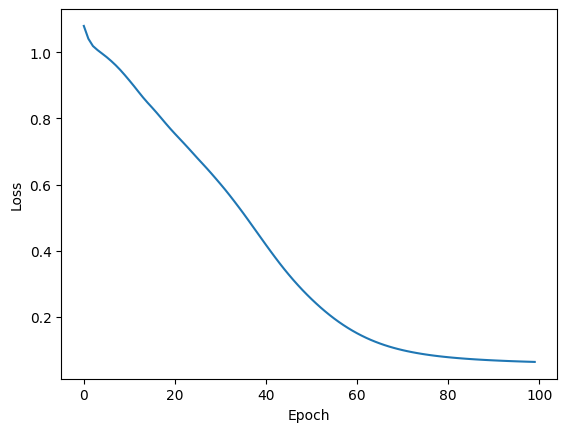

In [15]:
# Graph the loses
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [16]:
# Evaluate our model on the test dataset
with torch.no_grad(): # Turn off backpropagration (We already did it when training the model and found the appropriate weights and biases)
  y_eval = model.forward(X_test) # X_test is the tensor that holds our testing data, we send it forward to the NN
  loss = criterion(y_eval, y_test) # We calculate the loss with the output given by our model and the expected output

In [17]:
print(loss)

tensor(0.0659)


In [24]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    # Send each data example one by one through the trained model
    y_pred = model.forward(data)
    # Here, y_val is a tensor(vector) of 3 datas (equal to the number of output layers, which is equal to the possible output features).
    # This output of the final output layer is called Logits. # Logits are the raw, unnormalized outputs of a neural network's final layer
    # before any final layer activation function (like softmax or sigmoid) is applied.

    # Print the output the final layer of our neural network (before applying any final layer activation function) along with the actual flower type from the dataset
    print(f'{i+1}.) {str(y_pred)} \t {y_test[i]}')

    # Check if the prediction is correct or not
    predicted_class = torch.argmax(y_pred) # Returns the index of the maximum value in the tensor
    predicted_class = predicted_class.item() # Convert the tensor to a python integer
    if predicted_class == y_test[i]:
      correct += 1

print('Correct predictions:', correct)
accuracy = (correct/len(y_test))*100
print(f'Accuracy: {accuracy}%')

1.) tensor([-0.4402,  6.4620,  1.0862]) 	 1
2.) tensor([0.1496, 7.4859, 0.5028]) 	 1
3.) tensor([ 7.3081,  2.0244, -7.1154]) 	 0
4.) tensor([-1.8877,  6.3218,  2.5566]) 	 1
5.) tensor([-6.4418,  3.6362,  7.1339]) 	 2
6.) tensor([-10.2766,   1.4783,  10.9850]) 	 2
7.) tensor([ 7.0144,  2.3582, -6.8006]) 	 0
8.) tensor([ 7.7940,  2.1767, -7.6214]) 	 0
9.) tensor([-5.9370,  4.1301,  6.6296]) 	 2
10.) tensor([-7.7194,  3.4227,  8.4263]) 	 2
11.) tensor([-8.6363,  2.8679,  9.3475]) 	 2
12.) tensor([ 7.0126,  1.8853, -6.8088]) 	 0
13.) tensor([-8.0791,  2.6913,  8.7752]) 	 2
14.) tensor([-2.1973,  5.8967,  2.8627]) 	 1
15.) tensor([-5.6527,  4.4131,  6.3436]) 	 2
16.) tensor([0.0688, 7.2393, 0.5822]) 	 1
17.) tensor([-4.0564,  4.6450,  4.7252]) 	 2
18.) tensor([ 7.9235,  2.2250, -7.7561]) 	 0
19.) tensor([-1.6853,  6.3888,  2.3520]) 	 1
20.) tensor([-6.4712,  4.6720,  7.1868]) 	 2
21.) tensor([ 7.5340,  2.0798, -7.3510]) 	 0
22.) tensor([ 8.4300,  2.4139, -8.2829]) 	 0
23.) tensor([-8.7919, 

In [25]:
# Evaluate our model on a new data
new_iris_data = torch.tensor([4.2, 3.2, 0.4, 2.1])

In [29]:
def get_flower_type(index):
  if index == 0:
    return 'Iris Setosa'
  elif index == 1:
    return 'Iris Versicolour'
  elif index == 2:
    return 'Iris Virginica'

with torch.no_grad():
  y_pred = model.forward(new_iris_data)
  print(y_pred)

tensor([ 5.5331,  1.8426, -5.2591])


In [30]:
print(f'Model prediction: {get_flower_type(y_pred.argmax())}')

Model prediction: Iris Setosa
